In [79]:
import numpy as np
from pymultifracs import mfa
import matplotlib.pyplot as plt
from pymultifracs.simul import mrw
import pandas as pd
from pymultifracs.utils import build_q_log

In [115]:
H1 = 0.8
H2 = 0.3

lamdba1 = .17
lamdba2 = .17

n_per_class = 1000
length = 2048 #65536
L = length
X1 =  mrw(shape=(length,n_per_class), H=H1, lam=lamdba1, L=L).T
X2 =  mrw(shape=(length,n_per_class), H=H2, lam=lamdba2, L=L).T

In [116]:
# result = {'Transformation (shape)': trans_name_str}
#         result["shape"] = trans_X.shape[-1]
#         result['nb_trans'] = len(trans)

#         scaler = StandardScaler()
#         trans_X = scaler.fit_transform(trans_X) 
#         print(f"Transformation: {trans_name_str}, Shape: {trans_X.shape[-1]} ")
#         for clf_name, clf in classifiers.items():
#             kf = KFold(n_splits=5, shuffle=True, random_state=42)
#             scores = cross_val_score(clf, trans_X, y, cv=kf, scoring='accuracy')
#             result[f'{clf_name} accuracy'] = np.mean(scores)
#             result[f'{clf_name} std'] = np.std(scores)
#             print(f"Classifier: {clf_name}, "
#                   f"Mean Accuracy: {np.mean(scores):.3f}, Std Accuracy: {np.std(scores):.3f}")
        
#         results.append(result)

In [117]:
signal.shape

(65536,)

In [118]:
signal = X1[0]
dwt, lwt = mfa.mf_analysis_full(
        signal,
        scaling_ranges=[(2, 4)],
        q=[-10, -5, 0, 5, 10],
        n_cumul=2,
        p_exp=np.inf,
        gamint=0.0
        )
lwt_sf, lwt_cumul, lw_mfs, lwt_hmin = lwt
sf, cumul, mfs, hmin = dwt


In [119]:
lwt_cumul.log_cumulants

array([[[ 0.77216121]],

       [[-0.08395972]]])

In [120]:
hmin

array([[0.38222699]])

In [127]:
def get_df_mfa(signals, n_cumul=2):
    results = []
    for signal in signals:
        result = dict()
        dwt, lwt = mfa.mf_analysis_full(
        signal,
        scaling_ranges=[(2, 4)],
        q= [-10, -5, -2, 0, 2, 5, 10],#build_q_log(1, 10, 20), # q=[-10, -5, 0, 5, 10],
        n_cumul=n_cumul,
        p_exp=np.inf,
        gamint=0.0
        )
        lwt_sf, lwt_cumul, lwt_mfs, lwt_hmin = lwt
        sf, cumul, mfs, hmin = dwt

        def get_item(arr):
            return arr.item() if isinstance(arr,np.ndarray) else lwt_hmin

        result['std'] = signal.std()
        result['hmin'] = hmin.item()
        result['l_hmin'] = get_item(lwt_hmin) # lwt_hmin.item() if isinstance(lwt_hmin,np.ndarray) else lwt_hmin

        result['deg_h'] = mfs.hq.max() - mfs.hq.min()
        result['l_deg_h'] = lwt_mfs.hq.max() - lwt_mfs.hq.min()
        result['H'] = get_item(sf.H)
        result['l_H'] = get_item(lwt_sf.H)

        for i in range(n_cumul):
            result[f'cumul{i}'] = get_item(cumul.log_cumulants[i])
            result[f'l_cumul{i}'] = get_item(lwt_cumul.log_cumulants[i])
            
        results.append(result)
    return pd.DataFrame(results)

In [128]:
# sf.H

In [129]:
df_mfa1 = get_df_mfa(X1)
df_mfa2 = get_df_mfa(X2)

In [130]:
df_mfa1.describe() # include='all')

,std,hmin,deg_h,l_deg_h,H,l_H,cumul0,l_cumul0,cumul1,l_cumul1
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.278732,0.584000,1.661439,0.497217,0.780379,0.761513,0.809209,0.781128,-0.041353,-0.021202
std,0.157993,0.196566,1.040526,0.249297,0.072237,0.061162,0.087255,0.043767,0.217848,0.032998
min,0.053045,-0.038408,0.162774,0.064121,0.542825,0.564005,0.513022,0.660669,-0.628334,-0.129079
25%,0.159904,0.461596,0.862623,0.302230,0.734015,0.721277,0.750472,0.751608,-0.195188,-0.043981
50%,0.242012,0.583608,1.456455,0.463776,0.781858,0.760515,0.812654,0.779480,-0.061109,-0.022532
75%,0.362525,0.719518,2.280153,0.653582,0.831110,0.800386,0.866740,0.810379,0.103831,0.001020
max,1.051471,1.200062,7.031505,1.831568,0.998968,0.941761,1.089735,0.939754,0.939382,0.099959


In [131]:
df_mfa2.describe()

,std,hmin,deg_h,l_deg_h,H,l_H,cumul0,l_cumul0,cumul1,l_cumul1
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.607072,0.024375,1.652091,0.690975,0.220014,0.278585,0.245269,0.334633,-0.031142,-0.059426
std,0.203636,0.199192,1.059276,0.206071,0.068853,0.024862,0.082383,0.021460,0.220308,0.017218
min,0.267695,-0.560435,0.099179,0.121743,-0.018440,0.210922,-0.039165,0.255191,-0.614762,-0.110101
25%,0.461154,-0.110062,0.827526,0.544604,0.175500,0.261442,0.192395,0.319471,-0.178406,-0.070442
50%,0.566732,0.015020,1.433714,0.680531,0.218226,0.277914,0.246028,0.334789,-0.037387,-0.059131
75%,0.703427,0.152558,2.282849,0.819716,0.266196,0.293413,0.300583,0.349797,0.106354,-0.048600
max,1.600422,0.738864,7.526777,1.519443,0.458213,0.394771,0.569004,0.407194,0.840634,-0.005440


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


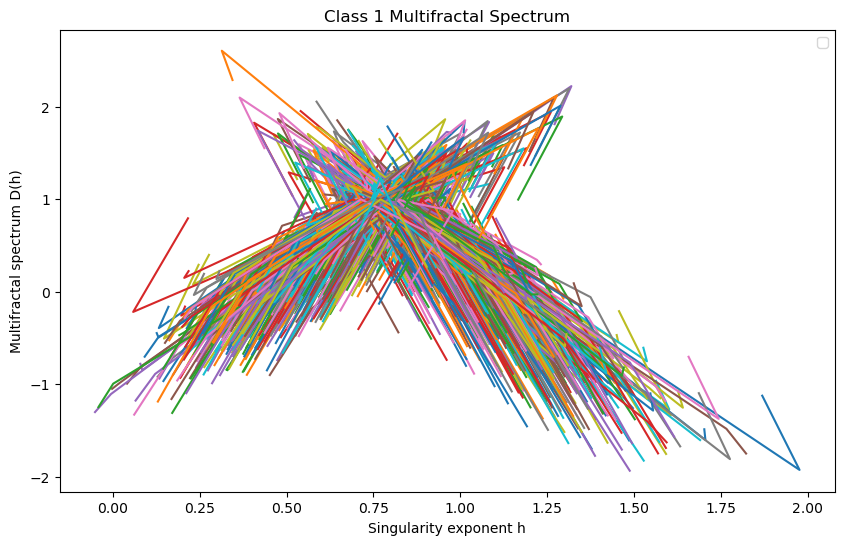

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


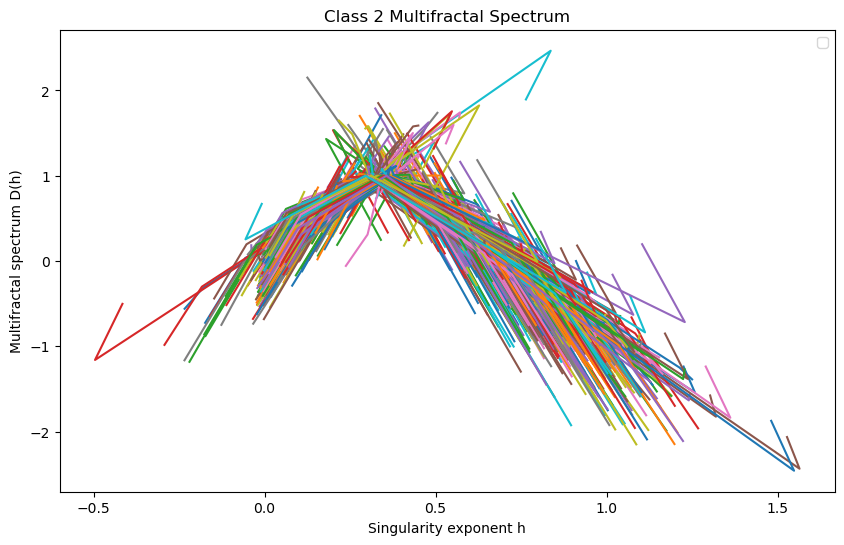

Signal 1 - Class 1: h_min = 0.4077641293761505, h_max = 1.1843430912997492
Signal 1 - Class 2: h_min = 0.0058245912234855535, h_max = 0.6533911588153143
--------------------------------------------------
Signal 2 - Class 1: h_min = 0.5729379828700933, h_max = 1.125395444789178
Signal 2 - Class 2: h_min = -0.00047447615539208954, h_max = 0.6279652711707118
--------------------------------------------------
Signal 3 - Class 1: h_min = 0.35543241508033496, h_max = 0.7238764633495443
Signal 3 - Class 2: h_min = 0.006061326675795287, h_max = 0.7974008452966295
--------------------------------------------------
Signal 4 - Class 1: h_min = 0.756400873760346, h_max = 0.9807286698086104
Signal 4 - Class 2: h_min = 0.17389140386511115, h_max = 0.6011252848203013
--------------------------------------------------
Signal 5 - Class 1: h_min = 0.4914228452311131, h_max = 1.2631859544636415
Signal 5 - Class 2: h_min = 0.0853819036785608, h_max = 0.792542940032215
-------------------------------------

In [132]:

# Step 2: Load the signals
# Assume we have two lists of signals, class1_signals and class2_signals
# Here, we generate some synthetic data for illustration purposes

# Generating synthetic data for two classes
np.random.seed(0)
# class1_signals = [np.cumsum(np.random.randn(1000)) for _ in range(10)]  # Random walk signals
# class2_signals = [np.cumsum(np.random.randn(1000) + 0.5) for _ in range(10)]  # Biased random walk signals

class1_signals = X1
class2_signals = X2
# Function to perform multifractal analysis
def perform_multifractal_analysis(signals):
    results = []
    for signal in signals:
        dwt, lwt = mfa.mf_analysis_full(
        signal,
        scaling_ranges=[(2, 4)],
        q=[-10, -5, 0, 5, 10],
        n_cumul=2,
        p_exp=np.inf,
        gamint=0.0
    )
        
        sf, cumul, mfs, hmin = lwt
        mf_analysis = mfs
    #         mf_analysis = MFAnalysis(signal, n_cumul=2, q=[-10, -5, 0, 5, 10])
    #         mf_analysis.analyze()
        results.append(mf_analysis)
    return results

# Step 3: Perform multifractal analysis
class1_results = perform_multifractal_analysis(class1_signals)
class2_results = perform_multifractal_analysis(class2_signals)

# Step 4: Compare characteristics
# Extracting and plotting the multifractal spectrum for the first signal in each class as an example

def plot_multifractal_spectrum(results, title):
    plt.figure(figsize=(10, 6))
    for result in results:
        spectrum = result
        plt.plot(spectrum.hq.squeeze(), spectrum.Dq.squeeze())#, label='Signal')
    plt.xlabel('Singularity exponent h')
    plt.ylabel('Multifractal spectrum D(h)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting the multifractal spectrum for the first signal in each class
plot_multifractal_spectrum(class1_results, 'Class 1 Multifractal Spectrum')
plot_multifractal_spectrum(class2_results, 'Class 2 Multifractal Spectrum')

# Compare other characteristics like the Hölder exponents, scaling functions, etc.
def compare_characteristics(class1_results, class2_results):
    # Extract and compare characteristics
    for i, (res1, res2) in enumerate(zip(class1_results, class2_results)):
        h_min1, h_max1 = res1.hq.min(), res1.hq.max()
        h_min2, h_max2 = res2.hq.min(), res2.hq.max()
        print(f'Signal {i + 1} - Class 1: h_min = {h_min1}, h_max = {h_max1}')
        print(f'Signal {i + 1} - Class 2: h_min = {h_min2}, h_max = {h_max2}')
        print('-' * 50)

compare_characteristics(class1_results, class2_results)
